# Método de Segunda Derivada
## Criterio de concavidad para clasificar puntos críticos

In [1]:
# Celda 1: Importaciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Celda 2: Función objetivo
f = lambda x: x**4 - 4*x**3 + 3*x**2 + 5
# Función ejemplo: x⁴ - 4x³ + 3x² + 5. Buscamos mínimo local en [0, 4].

In [3]:
# Celda 3: Implementación del método de segunda derivada
def metodo_segunda_derivada(f, x_critic=1, tol=1e-6, max_iter=100):
    h = 1e-8
    df = lambda x: (f(x+h) - f(x-h)) / (2*h)
    d2f = lambda x: (f(x+h) - 2*f(x) + f(x-h)) / h**2
    
    df_val = df(x_critic)
    d2f_val = d2f(x_critic)
    
    if abs(df_val) > 1e-4:
        clasificacion = "No es punto crítico"
    elif d2f_val > 0:
        clasificacion = "MÍNIMO LOCAL"
    elif d2f_val < 0:
        clasificacion = "MÁXIMO LOCAL"
    else:
        clasificacion = "INDEFINIDO (prueba no concluyente)"
    
    tabla = pd.DataFrame({
        'x_crítico': [x_critic],
        "f'(x)": [df_val],
        'f"(x)': [d2f_val],
        'Clasificación': [clasificacion]
    })
    
    return x_critic, tabla, [x_critic]

In [4]:
# Celda 4: Ejecución con caso por defecto
x_opt, tabla, historial = metodo_segunda_derivada(f, x_critic=1)

print("Punto crítico analizado:", x_opt)
print(tabla.round(6))

Punto crítico analizado: 1
   x_crítico  f'(x)  f"(x)        Clasificación
0          1   -2.0    0.0  No es punto crítico


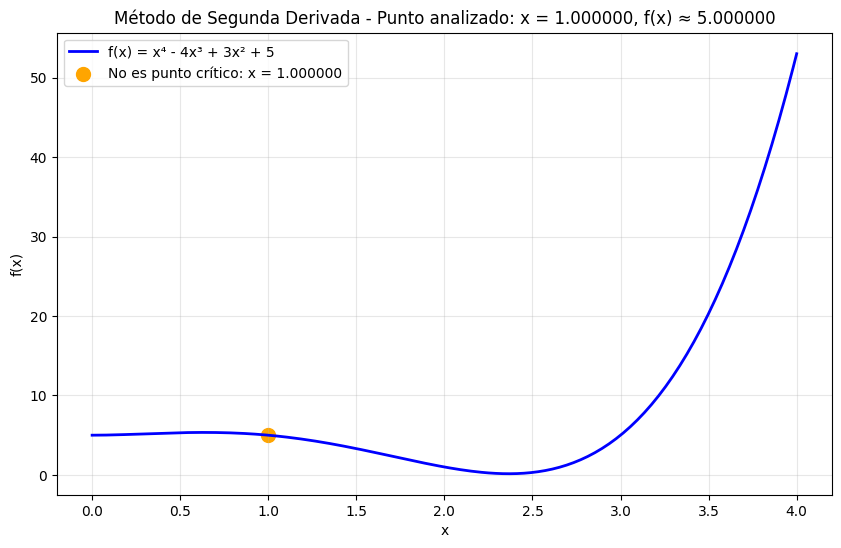

In [5]:
# Celda 5: Gráfica de convergencia
x = np.linspace(0, 4, 200)
y = f(x)
clasificacion = tabla.iloc[0]['Clasificación']

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x⁴ - 4x³ + 3x² + 5')
color = 'red' if 'MÍNIMO' in clasificacion else 'green' if 'MÁXIMO' in clasificacion else 'orange'
plt.scatter(x_opt, f(x_opt), color=color, s=100, label=f'{clasificacion}: x = {x_opt:.6f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Método de Segunda Derivada - Punto analizado: x = {x_opt:.6f}, f(x) ≈ {f(x_opt):.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
# Celda 6: Interfaz interactiva simple
print("=== Método de Segunda Derivada Interactivo ===")

# Función del usuario
f_str = input("Ingrese f(x) (dejar vacío para usar por defecto): ").strip()
if f_str:
    try:
        f_user = lambda x: eval(f_str)
        f_user(2)  # Validar
        f = f_user
        print(f"Usando función: {f_str}")
    except:
        print("Error: función no válida. Usando caso por defecto.")

# Punto crítico del usuario
point_str = input("Ingrese punto crítico a analizar (ej. 1.5) o dejar vacío: ").strip()
x_critic = 1
if point_str:
    try:
        x_critic = float(point_str)
    except:
        print("Punto inválido, usando x=1")

# Ejecutar método
try:
    x_opt_user, tabla_user, _ = metodo_segunda_derivada(f, x_critic)
    print(f"\nPunto crítico analizado: x = {x_opt_user:.6f}")
    print(tabla_user.round(6))
except Exception as e:
    print(f"Error: {e}")

=== Método de Segunda Derivada Interactivo ===

Punto crítico analizado: x = 1.000000
   x_crítico  f'(x)  f"(x)        Clasificación
0          1   -2.0    0.0  No es punto crítico
